# this note book will demonstrate how to simulate diffraction pattern

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
# customized module
import hexomap
from hexomap import reconstruction  # g-force caller
from hexomap import MicFileTool     # io for reconstruction rst
from hexomap import IntBin          # io for binary image (reduced data)
from hexomap import config
S = reconstruction.Reconstructor_GPU(gpuID=3)


# creating config

In [2]:
################# configuration #########################
Au_Config={
    'micsize' : np.array([20, 20]),
    'micVoxelSize' : 0.005,
    'micShift' : np.array([0.0, 0.0, 0.0]),
    'micMask' : None,
    'expdataNDigit' : 6,
    'energy' : 65.351,      #55.587 # in kev
    'sample' : 'gold',
    'maxQ' : 9,
    'etalimit' : 81 / 180.0 * np.pi,
    'NRot' : 180,
    'NDet' : 2,
    'searchBatchSize' : 6000,
    'reverseRot' : True,          # for aero, is True, for rams: False    
    'detNJ': np.array([2048, 2048]),
    'detNK': np.array([2048, 2048]),
    'detPixelJ': np.array([0.00148, 0.00148]),
    'detPixelK': np.array([0.00148, 0.00148]),
    'detL' : np.array([[4.53571404, 6.53571404]]),
    'detJ' : np.array([[1010.79405782, 1027.43844558]]),
    'detK' : np.array([[2015.95118521, 2014.30163539]]),
    'detRot' : np.array([[[89.48560133, 89.53313565, -0.50680978],
  [89.42516322, 89.22570012, -0.45511278]]]),
    'fileBin' : os.path.abspath(os.path.join(hexomap.__file__ ,"../..")) + '/examples/johnson_aug18_demo/Au_reduced_1degree/Au_int_1degree_suter_aug18_z',
    'fileBinDigit' : 6,
    'fileBinDetIdx' : np.array([0, 1]),
    'fileBinLayerIdx' : 0,
    '_initialString' : 'demo_gold_single_GPU'}
    
c = config.Config(**Au_Config)
print(c)


Configurations:
micsize                        [20 20]
micVoxelSize                   0.005
micShift                       [0. 0. 0.]
micMask                        None
expdataNDigit                  6
energy                         65.351
sample                         gold
maxQ                           9
etalimit                       1.413716694115407
NRot                           180
NDet                           2
searchBatchSize                6000
reverseRot                     True
detNJ                          [2048 2048]
detNK                          [2048 2048]
detPixelJ                      [0.00148 0.00148]
detPixelK                      [0.00148 0.00148]
detL                           [[4.53571404 6.53571404]]
detJ                           [[1010.79405782 1027.43844558]]
detK                           [[2015.95118521 2014.30163539]]
detRot                         [[[89.48560133 89.53313565 -0.50680978]
  [89.42516322 89.22570012 -0.45511278]]]
fileBin             

# run simulation:

> please check input structure and structure configuration matches together
>> e.g. if loading mic structure with shape=[20,20], voxelSize=0.005, make sure config.micsize=[20,20], micVoxelSize=0.005.

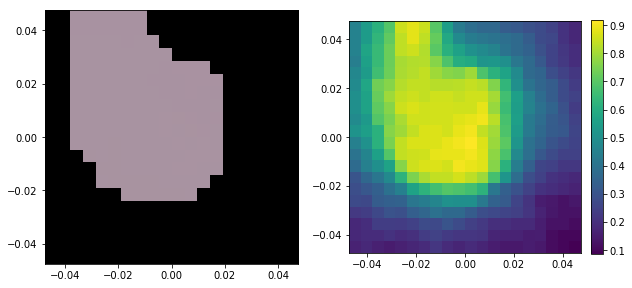

set Q automatically to 9
 reset searchBatchSize into 6000
============start of simulation ============= 

nvoxel: 146, norientation:1.0

============end of simulation================ 

SourceModule time 0.00040147200226783755 seconds.


1

In [3]:

# load structure to simulate
mic = np.load('demo_gold__q9_rot180_z0_20x20_0.005_shift_0.0_0.0_0.0.npy') 
mask = mic[:,:,6]> 0.6 # only simulate where hitratio>0.6

# visualize mic structure
MicFileTool.plot_mic_and_conf(mic, 0.6)

# load config
S.load_config(c,reloadData=False)  # load config but not raw images
S.squareMicData = mic
# run simulation
S.sim_mic(simMask=mask)
# save result
S.save_sim_mic_binary('simulated_demo_gold/demo_gold_sim_')

# visualize simulation pattern:

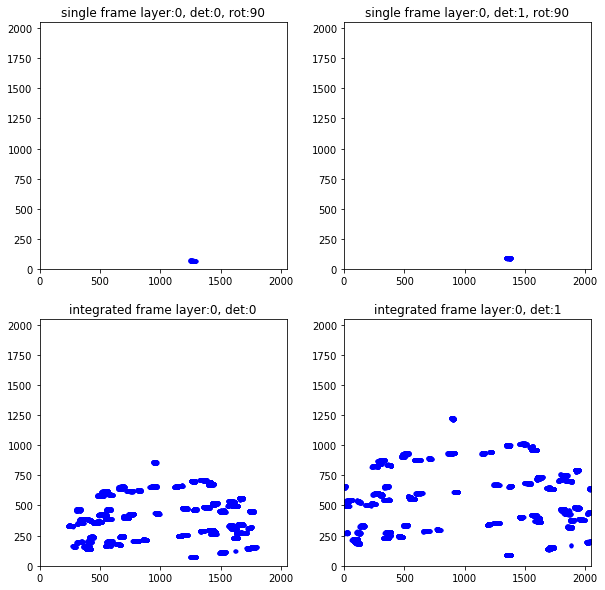

In [4]:
MicFileTool.plot_binary('simulated_demo_gold/demo_gold_sim_z', NRot=180, NDet=2, idxRot=90,idxLayer=0)

# visualize experimental pattern:

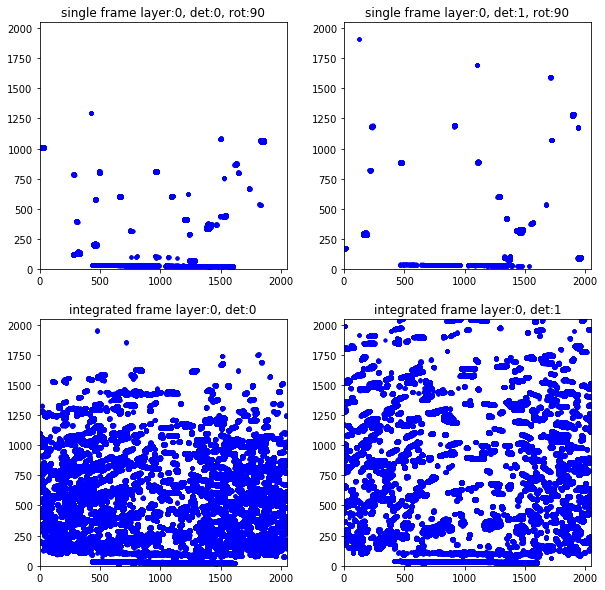

In [5]:
MicFileTool.plot_binary(c.fileBin, NRot=180, NDet=2, idxRot=90,idxLayer=0)

# reconstruciton with experimental data:

exp data loaded, shape is: (1781216, 4)./anaconda/anaconda3/envs/mpi_pycuda/lib/python3.6/site-packages/examples/johnson_aug18_demo/Au_reduced_1degree/Au_int_1degree_suter_aug18_z0_000179.bin1
copy exp data to gpu memory ...
start create exp data in cpu ram ...
 reset searchBatchSize into 6000
start reconstruction ... 

Niter: 20, vIdx: 0000377, prog: 0000001/0000400, conf: 0.236111, pkcnt: 72, euler: [ 40.1166  38.325  349.8981]
 
number of flood fills: 44
start post processing, moving grain boundaries untile stable ...
number of post process iteration: 2, number of voxel revisited: 25
post process takes is 0.132 seconds
reconstruction finished 

SourceModule time:  17.800 seconds.
saved as npy format: demo_gold_single_GPU_q9_rot180_z0_20x20_0.005_shift_0.0_0.0_0.0.npy


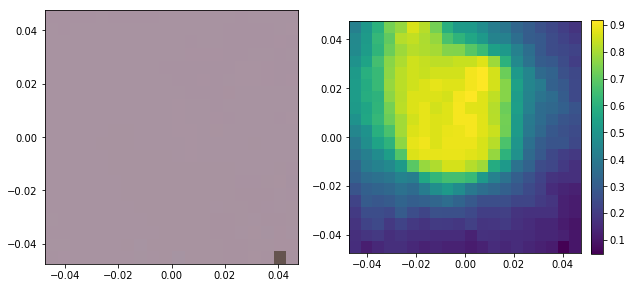

In [6]:
S.load_config(c)
S.serial_recon_multi_stage()
MicFileTool.plot_mic_and_conf(S.squareMicData, 0.04)

# reconstruction with simulation data:

exp data loaded, shape is: (17260, 4).mulated_demo_gold/demo_gold_sim_z0_000179.bin1
copy exp data to gpu memory ...
start create exp data in cpu ram ...
 reset searchBatchSize into 6000
start reconstruction ... 

Niter: 25, vIdx: 0000012, prog: 0000001/0000400, conf: 0.164179, pkcnt: 67, euler: [ 40.7275  38.0086 349.0566]
 
number of flood fills: 132
start post processing, moving grain boundaries untile stable ...
number of post process iteration: 3, number of voxel revisited: 235
post process takes is 1.192 seconds
reconstruction finished 

SourceModule time:  20.527 seconds.
saved as npy format: demo_gold_single_GPU_q9_rot180_z0_20x20_0.005_shift_0.0_0.0_0.0.npy


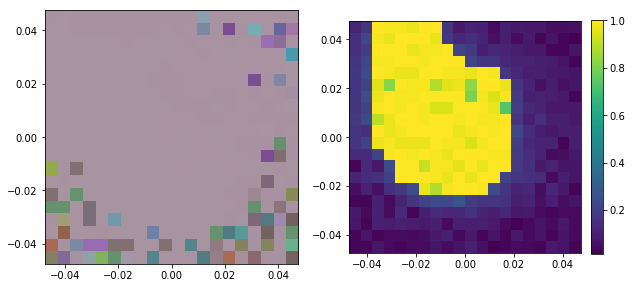

In [7]:
c.fileBin = 'simulated_demo_gold/demo_gold_sim_z'
S.load_config(c)
S.serial_recon_multi_stage()
MicFileTool.plot_mic_and_conf(S.squareMicData, 0.01)